In [52]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeCV

In [53]:
df = pd.read_csv("C:/Users/safye/Desktop/makine_ogrenmesi/dogRegMod/datalarr/archive/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [55]:
df.shape

(263, 20)

In [56]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [57]:
ridge_model

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [58]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [59]:
ridge_model.intercept_

np.float64(-4.5786269057206255)

In [60]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [61]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [62]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [63]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

In [64]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

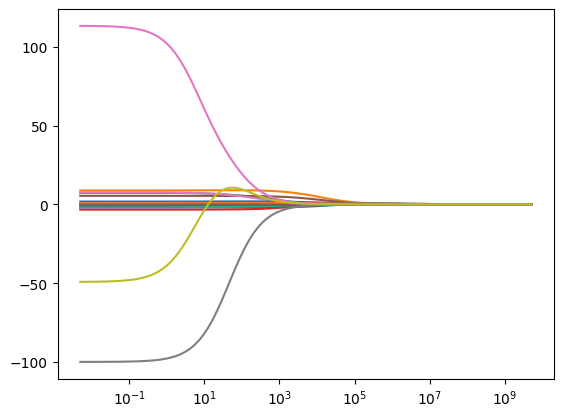

In [65]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")


Tahmin:

In [68]:
ridge_model = Ridge().fit(X_train, y_train)

In [70]:
y_pred = ridge_model.predict(X_train)

In [71]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [72]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [73]:
#train hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

np.float64(289.34470696006565)

In [76]:
from sklearn.model_selection import cross_val_score

In [79]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

np.float64(351.3931585606361)

In [80]:
#test hatası
y_pred = ridge_model.predict(X_test)

In [81]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

np.float64(356.8082905730236)

Model Tuning

In [85]:
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(356.8082905730236)

In [86]:
np.random.randint(0,1000,100)

array([821, 585, 900, 421,   5, 865, 141, 648, 908, 759, 736, 787, 478,
       216, 618, 103, 546, 758, 624, 708, 906, 814, 745, 734, 549, 868,
       735, 207, 906, 775, 445, 216, 807, 465, 445, 641, 575, 756, 844,
       381, 169,  62, 114, 454, 223, 170, 290,  56,   9, 474, 888, 596,
       881, 967, 965, 214, 661, 844, 183, 914, 380, 662, 310, 646, 996,
        21, 707, 881, 481, 470, 765, 669, 425, 534, 892,  73,  73, 451,
       739,  85, 102, 344, 288, 793, 863, 102,  47, 200, 115, 855, 380,
       741,  29, 732, 272, 643, 988, 818, 292, 591], dtype=int32)

In [87]:
lambdalar1 = np.random.randint(0,1000,100)

In [88]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [92]:
ridgecv = RidgeCV(alphas= lambdalar2, scoring="neg_mean_squared_error", cv=10)
ridgecv.fit(X_train, y_train)

,alphas,array([5.0000...00000000e-03])
,fit_intercept,True
,scoring,'neg_mean_squared_error'
,cv,10
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [93]:
ridgecv.alpha_

np.float64(1526927.7544167063)

In [94]:
#final modeli

In [95]:
ridge_tuned = Ridge(alpha=ridgecv.alpha_).fit(X_train, y_train)

In [96]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(385.86438561469294)